Homework 5 

by Jordan Ehrman

for AMATH 584 with Dr. Kutz
10/5/2020

# Question I 
## Part A - generating random symmetrix 10x10 matrix 

In [1]:
import numpy as np 

In [2]:
notsym = np.random.randint(0,100,size=(10,10))

In [3]:
symmat = notsym + notsym.T

In [4]:
symmat

array([[ 28,  81,  95,  50,  73,  80,  85, 123,  50,  42],
       [ 81,  10, 195, 127,  54,  84,  60, 133, 163,  86],
       [ 95, 195, 122, 115, 110, 107,  74,  11, 115, 164],
       [ 50, 127, 115, 172, 123,  40, 161, 102,  16, 114],
       [ 73,  54, 110, 123,  36, 121,  70, 128, 103,  56],
       [ 80,  84, 107,  40, 121, 128, 103, 144,  76, 106],
       [ 85,  60,  74, 161,  70, 103,  22,  70,  67,  84],
       [123, 133,  11, 102, 128, 144,  70,   2, 127, 120],
       [ 50, 163, 115,  16, 103,  76,  67, 127, 154, 146],
       [ 42,  86, 164, 114,  56, 106,  84, 120, 146, 160]])

yep that's a random symmetric matrix. 
## finding eigenvalues

In [5]:
np.linalg.eig(symmat)

(array([ 969.83976758, -244.38591595, -178.4309276 ,  182.56258967,
         132.25124846,  -17.14062194,  -62.75987556,  -48.88678723,
          51.74739425,   49.20312832]),
 array([[ 0.23025621, -0.1604638 , -0.32944453, -0.03547217, -0.28825838,
          0.70240988,  0.27875783,  0.19365711,  0.3405802 ,  0.06136007],
        [ 0.33083617, -0.53252873,  0.3431605 ,  0.09030422,  0.18164372,
          0.07735834, -0.54470585, -0.0677724 ,  0.36266285, -0.09615585],
        [ 0.36717947,  0.46625622,  0.06993978,  0.05150703,  0.43070538,
         -0.10323682,  0.12149656,  0.04531082,  0.40414344,  0.51373968],
        [ 0.33085095,  0.05736547, -0.43990515, -0.72145391,  0.20496459,
         -0.13056641, -0.20278592,  0.03750301, -0.0630383 , -0.26014238],
        [ 0.28618861, -0.28348714,  0.22414102, -0.09265914, -0.27006325,
         -0.5264864 ,  0.46135138,  0.43546563,  0.12969336, -0.09740816],
        [ 0.31928017, -0.07185736, -0.29807844,  0.11815743, -0.54566875,
     

In [6]:
eigenvalist,eigenveclist = np.linalg.eig(symmat)

That's ten eigenvalues and ten eigenvectors, as is expected!

## Part B -- power iterating

In [7]:
from copy import deepcopy
def power_iterating(mat,size,niter):
    pieigvallist = []
    #choosing my random initial vector
    initvec = np.random.rand(size,1)
    tempvec = deepcopy(initvec)
    # iterating 
    for i in range(niter):
        newvecunnorm = np.dot(mat,tempvec)
        normonewvec = np.linalg.norm(newvecunnorm)
        tempvec = deepcopy(newvecunnorm / normonewvec)
        eigval = np.dot(tempvec.T, np.dot(mat,tempvec))
        pieigvallist.append(eigval)
    return(pieigvallist)

In [8]:
power_iterating(symmat,10,10)

[array([[963.93066477]]),
 array([[969.63515167]]),
 array([[969.83183757]]),
 array([[969.839433]]),
 array([[969.83975206]]),
 array([[969.83976679]]),
 array([[969.83976754]]),
 array([[969.83976758]]),
 array([[969.83976758]]),
 array([[969.83976758]])]

It converged! 
## visualizing error as a function of number of iterations

In [9]:
import matplotlib.pyplot as plt
eigenvalist[0]

969.8397675799183

In [10]:
listofest = power_iterating(symmat,10,20)

In [11]:
errorlist = []
for i in range(len(listofest)):
    error = abs(listofest[i] - eigenvalist[0])
    errorlist.append(error)

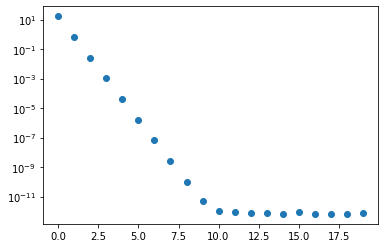

In [12]:
fig = plt.scatter(range(20),errorlist)
ax = plt.gca()
ax.set_yscale('log')

Error consistently drops exponentially until the estimated eigenvalue and real eigenvalue are equal to E-12 error!

## Part C - using Rayleigh Quotients

In [12]:
def rq(A,niter,initvec,initval):
    identitymat = np.identity(10)
    tempmat = deepcopy(A.astype(float))
    eigtracker = []
    #normal rayleigh quotient iteration
    tempinitvec = initvec
    initeigenval = initval
    tempvec = deepcopy(tempinitvec)
    tempeval = deepcopy(initeigenval)
    eigtracker.append(tempeval)
    for j in range(niter):
        try: 
            uninvmat = tempmat - np.dot(tempeval,identitymat)
            invmat = np.linalg.inv(uninvmat)
            newvec = np.dot(invmat,tempvec)
            normnew = np.linalg.norm(newvec)
            normedvec = newvec / normnew
            btab = np.dot(np.conj(normedvec.T),np.dot(tempmat,normedvec))
            btb = np.dot(np.conj(normedvec.T),normedvec)
            neweval = btab / btb
            tempeval = deepcopy(neweval[0][0])
            tempvec = deepcopy(normedvec)
            eigtracker.append(tempeval)
        except:
            continue
    return eigtracker

In [14]:
rq(symmat,20,np.random.rand(10,1)*10 - 5,82)

[82,
 80.00157770474516,
 80.25399949462289,
 74.3041112392389,
 61.296797247913965,
 54.56824423432511,
 54.435026418016975,
 54.43502574477557,
 54.43502574477558,
 54.43502574477558,
 54.43502574477557,
 54.43502574477559,
 54.4350257447756,
 54.43502574477559,
 54.43502574477559,
 54.43502574477559,
 54.43502574477559,
 54.43502574477557,
 54.43502574477559,
 54.43502574477559,
 54.43502574477557]

I could try to guess different ansatz eigenvecs to find all ten eigenvals, or I could just come up with an itterative way to find them all. I will try an iterative way. 

In [15]:
import math
discoveredeigenval = []
while len(discoveredeigenval) < 10: 
    eigenvalansatz = np.random.randint(-2000,2000)
    rqeigval = rq(symmat,20,np.random.rand(10,1)*10 - 5,eigenvalansatz)[-1]
    if len(discoveredeigenval) == 0:
        discoveredeigenval.append(rqeigval)
    else:
        counter = 0 
        for i in discoveredeigenval:
            if math.isclose(i,rqeigval):
                continue
            else:
                counter += 1
        if counter == len(discoveredeigenval):
            discoveredeigenval.append(rqeigval)

In [16]:
discoveredeigenval

[113.57719673041241,
 -86.83753740362043,
 -34.15978827139466,
 126.78580872526891,
 54.43502574477559,
 193.50634887495926,
 -109.9739873896832,
 17.808251255302135,
 980.6066373121855,
 -195.74795557820545]

In [17]:
eigenvalist

array([ 980.60663731, -195.74795558,  193.50634887,  126.78580873,
        113.57719673, -109.97398739,  -86.8375374 ,  -34.15978827,
         17.80825126,   54.43502574])

### the iterative method using Rayleigh Quotient iteration with random initial eigenvector and eigenvalue ansatz finds all ten eigenvalues! 
## visualizing error as a function of iterations

In [18]:
eigtracker = rq(symmat,20,np.random.rand(10,1)*10 - 5,10000)

In [19]:
errorlist = []
for i in range(len(eigtracker)):
    error = abs(eigtracker[i] - min(eigenvalist, key=lambda x:abs(x-eigtracker[i])))
    errorlist.append(error)

In [20]:
errorlist

[9019.393362687813,
 4.903951296990712,
 1.3583500200753065,
 0.022127611040914985,
 6.21570990233522e-08,
 1.4210854715202004e-14,
 4.263256414560601e-14,
 1.4210854715202004e-14,
 4.263256414560601e-14,
 1.4210854715202004e-14,
 4.263256414560601e-14,
 1.4210854715202004e-14,
 1.4210854715202004e-14,
 5.684341886080802e-14,
 2.842170943040401e-14,
 4.263256414560601e-14,
 1.4210854715202004e-14,
 4.263256414560601e-14,
 1.4210854715202004e-14,
 1.4210854715202004e-14,
 5.684341886080802e-14]

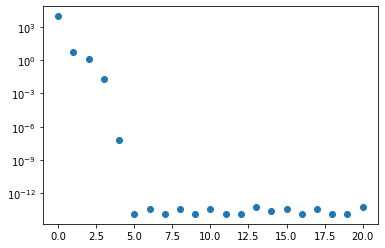

In [21]:
fig = plt.scatter(range(21),errorlist)
ax = plt.gca()
ax.set_yscale('log')

## this method converges to ~10^-13 error after 5 itterations -- much quicker and more accurate than power iterations! 

## part d part 1 -- power iteration with nonsymmetric matrix

In [13]:
notsym = np.random.randint(0,100,size=(10,10))

In [14]:
notsym

array([[71, 78, 81,  7, 13, 67, 38, 97, 59,  6],
       [69, 63, 34, 38, 14, 73, 30, 21, 34, 20],
       [40, 16, 13, 47, 97, 98, 54,  5, 85, 24],
       [13, 87, 58, 18, 48, 61, 31, 35, 11,  9],
       [14,  1, 50, 24, 57, 66, 93, 44, 34, 90],
       [74, 12, 59, 33, 72, 69, 25, 98, 87, 72],
       [47, 49, 24, 36, 61, 82, 68, 40,  3, 49],
       [67, 71, 35,  4, 90, 41, 79, 80, 15, 81],
       [ 4, 99, 32, 73, 28, 51, 26, 54, 25, 29],
       [60, 89, 83, 84, 79, 20, 32, 92, 97, 11]])

yep that is not symmetric at all 

In [15]:
eigenvalist,eigenveclist = np.linalg.eig(notsym)

In [16]:
eigenvalist

array([497.88696194 +0.j        ,  81.09669791 +0.j        ,
        58.64995336 +0.j        ,  17.9367897 +61.91291827j,
        17.9367897 -61.91291827j, -77.61916909 +0.j        ,
       -41.91156437+53.24478211j, -41.91156437-53.24478211j,
       -18.53244738+41.27190146j, -18.53244738-41.27190146j])

yep some eigenvalues are complex

In [17]:
listofest = power_iterating(notsym,10,20)

In [18]:
listofest

[array([[493.69693218]]),
 array([[497.0605424]]),
 array([[497.91987843]]),
 array([[497.89156619]]),
 array([[497.88616423]]),
 array([[497.88707207]]),
 array([[497.88695067]]),
 array([[497.88696002]]),
 array([[497.88696242]]),
 array([[497.88696192]]),
 array([[497.88696194]]),
 array([[497.88696194]]),
 array([[497.88696194]]),
 array([[497.88696194]]),
 array([[497.88696194]]),
 array([[497.88696194]]),
 array([[497.88696194]]),
 array([[497.88696194]]),
 array([[497.88696194]]),
 array([[497.88696194]])]

it was still able to find the largest eigenvalue using power itterations with relative ease, but that also might be because the largest eigenvalue happened to be real. Let's visualize error as a function of iterations

In [19]:
errorlist = []
for i in range(len(listofest)):
    error = abs(listofest[i] - eigenvalist[0])
    errorlist.append(error)

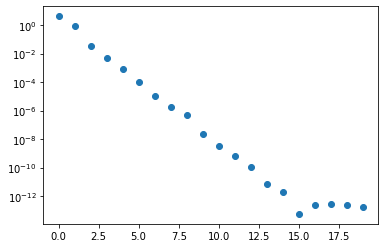

In [20]:
fig = plt.scatter(range(20),errorlist)
ax = plt.gca()
ax.set_yscale('log')

This time it took about 15 iterations to converge past 10E-10, as opposed to ten for the symmetric matrix. Again, this might have been different if the largest eigenvalue was complex. 

## Part D part 2 -- Rayleigh Quotients with nonsymmetric matrix

In [21]:
rq(notsym,20,np.random.rand(10,1)*10 - 5,-300 -0.5j)

[(-300-0.5j),
 (7.892535296032403-0.01682615003721574j),
 (19.52405297179189-0.02676039481434218j),
 (32.2745701041348-0.08529651337301829j),
 (5.202545293745038-0.16282381814665867j),
 (7.320144529713227-0.5226271904721813j),
 (20.318734933233117-1.000617483702607j),
 (53.18270784266268-2.5986238382562274j),
 (59.14737956042342+1.2469052416516533j),
 (58.63933650658775-0.010572410835250958j),
 (58.65005565014237-9.197325552889879e-05j),
 (58.64995336307242+6.572467015075746e-10j),
 (58.64995336313588+0j),
 (58.64995336313589+0j)]

My code is able to converge to at least one of the complex eigenvalues! Let's see if it's able to find all ten

In [23]:
import cmath
import math
discoveredeigenval = []
while len(discoveredeigenval) < 10: 
    eigenvalansatz = np.random.randint(-2000,2000)
    imeigvalansatz = np.random.randint(-2000,2000)
    rqeigval = rq(notsym,20,np.random.rand(10,1)*10 - 5,complex(eigenvalansatz,imeigvalansatz))[-1]
    if len(discoveredeigenval) == 0:
        discoveredeigenval.append(rqeigval)
    else:
        counter = 0
        if rqeigval.imag > 0.00001:
            for i in discoveredeigenval:
                if math.isclose(i.real,rqeigval.real) & math.isclose(i.imag,rqeigval.imag):
                    continue
                else:
                    counter += 1
        else:
            for i in discoveredeigenval:
                if math.isclose(i.real,rqeigval.real):
                    continue
                else:
                    counter += 1
        if counter == len(discoveredeigenval):
            discoveredeigenval.append(rqeigval)
            print(rqeigval)

(-18.53244738295779-41.27190146130647j)
(-18.532447382957802+41.27190146130646j)
(58.64995336313589+0j)
(-77.61916909387291-1.77635683940025e-15j)
(497.88696194188003+0j)
(-41.91156437395852-53.244782112978044j)
(17.93678969712936+61.91291826644245j)
(-41.91156437395852+53.24478211297804j)
(-19.466693608565684+0j)


## I was able to get all eigenvalues! Let's see how the error as a function of iteration number works.

In [25]:
eigentracker = rq(notsym,20,np.random.rand(10,1)*10 - 5,complex(-50,50))

In [26]:
eigentracker

[(-50+50j),
 (-42.90883392131817+49.16426345489595j),
 (-41.67663161877528+53.05399172908752j),
 (-41.91245674300462+53.2464034906959j),
 (-41.91156429598013+53.24478222043153j),
 (-41.91156437395853+53.24478211297806j),
 (-41.911564373958505+53.24478211297804j),
 (-41.91156437395853+53.24478211297804j),
 (-41.91156437395853+53.24478211297805j),
 (-41.911564373958505+53.24478211297804j),
 (-41.91156437395851+53.24478211297803j),
 (-41.91156437395853+53.244782112978044j),
 (-41.91156437395852+53.24478211297806j),
 (-41.911564373958505+53.24478211297803j),
 (-41.91156437395851+53.244782112978044j),
 (-41.91156437395852+53.244782112978044j),
 (-41.91156437395853+53.24478211297806j),
 (-41.91156437395852+53.244782112978044j),
 (-41.911564373958534+53.244782112978044j),
 (-41.91156437395851+53.244782112978044j),
 (-41.91156437395852+53.244782112978044j)]

I don't know how to plot 3D graphs with pyplot, but I can look at the imaginary and real parts separately

In [30]:
errorlist = []
for i in range(len(eigentracker)):
    error = abs(eigentracker[i].real - eigenvalist[6].real)
    errorlist.append(error)

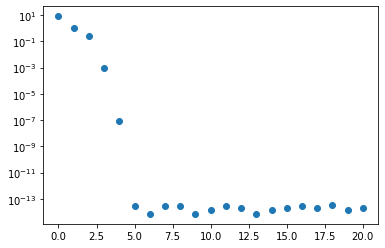

In [31]:
fig = plt.scatter(range(21),errorlist)
ax = plt.gca()
ax.set_yscale('log')

real part converged in 5 steps! now testing imaginary

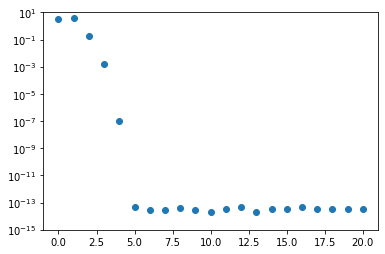

In [32]:
errorlist = []
for i in range(len(eigentracker)):
    error = abs(eigentracker[i].imag - eigenvalist[6].imag)
    errorlist.append(error)
fig = plt.scatter(range(21),errorlist)
ax = plt.gca()
ax.set_ylim(1*10**-15,10)
ax.set_yscale('log')

Imaginary part also converges in around 6 steps!!

# question 2 -- yale faces

In [33]:
# importing packages and faces
import os
import re

In [34]:
def read_pgm(filename, byteorder='>'):
    """Return image data from a raw PGM file as numpy array.

    Format specification: http://netpbm.sourceforge.net/doc/pgm.html

    """
    with open(filename, 'rb') as f:
        buffer = f.read()
    try:
        header, width, height, maxval = re.search(
            b"(^P5\s(?:\s*#.*[\r\n])*"
            b"(\d+)\s(?:\s*#.*[\r\n])*"
            b"(\d+)\s(?:\s*#.*[\r\n])*"
            b"(\d+)\s(?:\s*#.*[\r\n]\s)*)", buffer).groups()
    except AttributeError:
        raise ValueError("Not a raw PGM file: '%s'" % filename)
    return np.frombuffer(buffer,
                            dtype='u1' if int(maxval) < 256 else byteorder+'u2',
                            count=int(width)*int(height),
                            offset=len(header)
                            ).reshape((int(height), int(width)))

In [35]:
image = read_pgm("../CroppedYale/yaleB01/yaleB01_P00A+000E+00.pgm", byteorder='<')

In [36]:
templistofpixels = []
for i in image:
    for j in i:
        templistofpixels.append(j)
        
bigmatrix = np.matrix([templistofpixels]).T

In [37]:
for i in os.listdir('../CroppedYale/'):
    print(i)
    for j in os.listdir('../CroppedYale/' + i):
        try:
            tempimage = read_pgm('../CroppedYale/' + i + '/' + j)
            templistofpixels=[]
            for k in tempimage:
                for l in k:
                    templistofpixels.append(l)
            temparrayofpixels = np.matrix([templistofpixels]).T
            bigmatrix = np.append(bigmatrix,temparrayofpixels,1)
        except:
            continue

yaleB38
yaleB24
yaleB30
yaleB35
yaleB15
yaleB16
yaleB19
yaleB25
yaleB18
yaleB09
yaleB27
yaleB17
yaleB21
yaleB37
yaleB05
yaleB22
yaleB33
yaleB23
yaleB04
yaleB10
yaleB06
yaleB12
yaleB32
yaleB31
yaleB28
yaleB03
yaleB08
yaleB34
yaleB39
yaleB02
yaleB01
yaleB07
yaleB11
yaleB20
yaleB26
yaleB36
yaleB13
yaleB29


In [38]:
np.shape(bigmatrix)

(32256, 2428)

In [67]:
# redefining my power iteration matrix to give me back my val and vec

def power_iterating2(mat,size,niter):
    pieigvallist = []
    #choosing my random initial vector
    initvec = np.asarray(np.random.rand(size,1))
    tempvec = np.asarray(deepcopy(initvec))
    mat = np.asarray(mat)
    # iterating 
    for i in range(niter):
        newvecunnorm = np.dot(mat,tempvec)
        normonewvec = np.linalg.norm(newvecunnorm)
        tempvec = np.asarray(deepcopy(newvecunnorm / normonewvec))
        eigval = np.dot(np.dot(tempvec.T, mat),tempvec)
        pieigvallist.append(eigval)
    return(tempvec)

In [40]:
corrmatrix = np.matmul(bigmatrix.T,bigmatrix)

In [46]:
corrmatrix = corrmatrix / 2428

In [69]:
returnvec = power_iterating2(corrmatrix,2428,20)

In [71]:
np.shape(returnvec)

(2428, 1)

now running an svd to compare 

In [72]:
u, s, vt = np.linalg.svd(corrmatrix)

In [79]:
u.T[0]

matrix([[-0.02003964, -0.0204731 , -0.02062021, ..., -0.0205609 ,
         -0.02011904, -0.0202476 ]])

In [80]:
returnvec

array([[0.02003964],
       [0.0204731 ],
       [0.02062021],
       ...,
       [0.0205609 ],
       [0.02011904],
       [0.0202476 ]])

these two look similar, (except for a sign change) so I will now see how similar they are

In [81]:
np.linalg.norm(u.T[0] + returnvec)

1.6331446793207287

Cool! Now I can see how the error scales as I increase the number of iterations

In [84]:
errorlist = []
for i in range(20):
    returnvec = power_iterating2(corrmatrix,2428,i)
    errorlist.append(np.linalg.norm(u.T[0] + returnvec))


In [85]:
errorlist

[1357.6322704729027,
 1.6625852913193717,
 1.6331428983834215,
 1.6331448699860063,
 1.6331446690409128,
 1.6331446789188528,
 1.6331446793154887,
 1.6331446793204605,
 1.6331446793207238,
 1.6331446793207285,
 1.6331446793207287,
 1.6331446793207287,
 1.6331446793207285,
 1.6331446793207287,
 1.6331446793207287,
 1.6331446793207285,
 1.6331446793207287,
 1.6331446793207287,
 1.6331446793207285,
 1.6331446793207285]

After five iterations, the error no longer decreases. Interesting!

## 2b -- generating a randomized SVD from my correlation matrix

In [86]:
corrmatrix

matrix([[0.07042834, 0.05766063, 0.08113674, ..., 0.00988468, 0.07578254,
         0.00411862],
        [0.05766063, 0.10461285, 0.05518946, ..., 0.04530478, 0.05189456,
         0.01400329],
        [0.08113674, 0.05518946, 0.00453048, ..., 0.1029654 , 0.04118616,
         0.09308072],
        ...,
        [0.00988468, 0.04530478, 0.1029654 , ..., 0.09019769, 0.02594728,
         0.026771  ],
        [0.07578254, 0.05189456, 0.04118616, ..., 0.02594728, 0.1029654 ,
         0.08772652],
        [0.00411862, 0.01400329, 0.09308072, ..., 0.026771  , 0.08772652,
         0.03253707]])

starting from a correlation matrix, I will generate a Y matrix by multiplying my corrmatrix by a random matrix with the same number of rows as corrmatrix has columns

In [93]:
omega = np.random.rand(2428,300)

In [94]:
ymat = np.dot(corrmatrix,omega)

In [95]:
ymat

matrix([[63.25098844, 63.91446116, 62.53754764, ..., 64.06254256,
         63.49103431, 60.81719721],
        [64.64872661, 64.56803464, 63.78581989, ..., 64.76092577,
         64.00653481, 61.88024438],
        [65.3734738 , 65.07845732, 64.96888891, ..., 65.11844587,
         64.89171437, 63.00316177],
        ...,
        [64.7680896 , 65.23289471, 63.95859641, ..., 64.96814357,
         64.15100579, 61.99276986],
        [63.83120974, 64.11043927, 62.49426998, ..., 62.5442743 ,
         63.63134073, 60.74005958],
        [63.53338426, 64.29350142, 63.0244225 , ..., 63.53559098,
         63.34353057, 60.29546273]])

Now I can run a qr decomp on ymat to get a Q I need 

In [96]:
q,r = np.linalg.qr(ymat)

In [103]:
q

matrix([[-2.00320822e-02,  1.26673919e-02,  7.22905139e-04, ...,
         -3.70777142e-02,  6.72229217e-03, -2.77616819e-02],
        [-2.04747568e-02, -1.14507866e-02, -7.27434922e-03, ...,
          2.76307603e-04, -1.39847203e-02, -1.52931927e-02],
        [-2.07042899e-02, -1.84411234e-02, -2.89598292e-02, ...,
         -7.59130074e-04,  1.78099634e-03, -3.52424413e-02],
        ...,
        [-2.05125600e-02,  6.07191589e-03,  4.84749654e-05, ...,
          2.33073702e-03, -2.65522724e-02, -5.52334635e-03],
        [-2.02158428e-02,  2.33555647e-04,  1.75875583e-02, ...,
          4.17708830e-02,  4.79651842e-03, -1.14782769e-02],
        [-2.01215191e-02,  1.57360591e-02, -5.60056116e-03, ...,
          1.06312427e-02, -1.21642437e-02,  2.54647581e-02]])

In [102]:
np.shape(ymat)

(2428, 300)

by taking q.T and multiplying it by my original matrix, I can get matrix B. 

In [104]:
Bmat = np.dot(q.T,corrmatrix)

In [105]:
Bmat

matrix([[-2.55377007e+00, -2.60917601e+00, -2.62750061e+00, ...,
         -2.62055384e+00, -2.56413575e+00, -2.58030743e+00],
        [ 2.50095483e-02, -4.91388786e-03,  3.60095627e-02, ...,
         -2.15758500e-02,  5.52863086e-02, -1.34874946e-03],
        [-4.09519721e-02,  5.11013368e-02, -8.32902108e-02, ...,
          2.13154759e-02, -1.41778303e-02, -4.24173911e-02],
        ...,
        [ 5.96439239e-02, -3.69545356e-03,  1.10329320e-02, ...,
          6.20034288e-02,  4.72657777e-02, -3.48882651e-03],
        [ 7.72497222e-03,  4.56542653e-02,  4.79640309e-02, ...,
          1.85820880e-02, -2.11846832e-03, -7.42884805e-02],
        [-1.46232172e-02,  3.61749532e-03,  2.48067201e-02, ...,
          1.01337058e-01, -3.56077245e-02, -3.74289103e-02]])

In [106]:
np.shape(Bmat)

(300, 2428)

Then I can run an SVD on my Bmat 

In [107]:
uprime,sigprime,vtprime = np.linalg.svd(Bmat)

To compare these with my other 

In [112]:
np.shape(uprime)

(300, 300)

In [113]:
np.shape(u)

(2428, 2428)

Then, once multiplying these by q, I should get a matrix that I can compare to the SVD of the original correlation matrix. 

In [117]:
uest = np.dot(q,uprime)

In [119]:
np.shape(uest)

(2428, 300)

Columns of uest should match up fairly well with columns of u

In [122]:
np.linalg.norm(uest.T[0] - u.T[0])

0.0003570756336662345

Comparing to two columns that are not meant to represent the same mode

In [123]:
np.linalg.norm(uest.T[0] - u.T[1])

1.4142345001224501

Therefore, uest.T[0] is an approximation of u.T[0] ! 

## Part 2c

Let's see how changing the number of columns in omega changes the accuracy

In [134]:
errorlist = []
for i in range(120):
    omega = np.random.rand(2428,i*10 + 1)
    ymat = np.dot(corrmatrix,omega)
    q,r = np.linalg.qr(ymat)
    Bmat = np.dot(q.T,corrmatrix)
    uprime,sigprime,vtprime = np.linalg.svd(Bmat)
    uest = np.dot(q,uprime)
    errorlist.append(np.linalg.norm(uest.T[0] - u.T[0]))

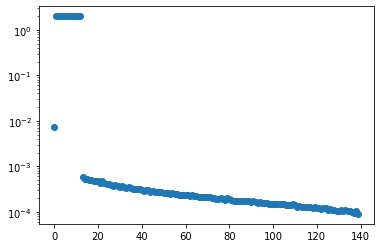

In [132]:
plt.scatter(range(140),errorlist)

ax = plt.gca()
ax.set_yscale('log')

As expected, increased dimension of omega lead to greater accuracy of the estimated columns of u! We can repeat this process for other columns of u.

In [157]:
errorlist0 = []
errorlist1 = []
errorlist2 = []
for i in range(150):
    omega = np.random.rand(2428,i*10 + 5)
    ymat = np.dot(corrmatrix,omega)
    q,r = np.linalg.qr(ymat)
    Bmat = np.dot(q.T,corrmatrix)
    uprime,sigprime,vtprime = np.linalg.svd(Bmat)
    uest = np.dot(q,uprime)
    errorlist0.append(np.linalg.norm(uest.T[0] - u.T[0]))
    errorlist1.append(np.linalg.norm(uest.T[1] - u.T[1]))
    errorlist2.append(np.linalg.norm(uest.T[2] - u.T[2]))
    if i % 10 == 0:
        print(i)

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140


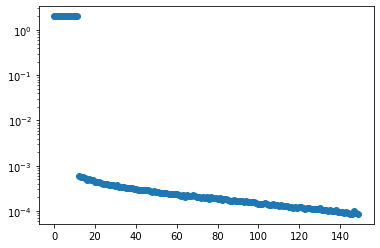

In [158]:
plt.scatter(range(150),errorlist0)
ax = plt.gca()
ax.set_yscale('log')

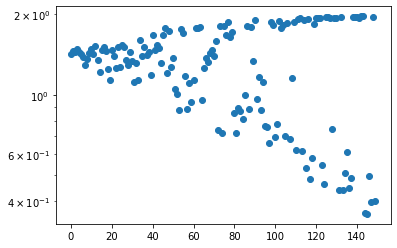

In [159]:
plt.scatter(range(150),errorlist1)
ax = plt.gca()
ax.set_yscale('log')

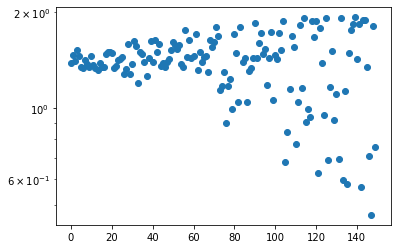

In [160]:
plt.scatter(range(150),errorlist2)
ax = plt.gca()
ax.set_yscale('log')

As can be seen from these three examples, the first column of U decreases very obviously with increased columns of omega. The next two columns, having a much lower singular value, do not decrease as consistently -- though their running average may generally decrease with increased columns of omega. This is somewhat expected given that the first singular value is over ~50x greater than the second or third, which are relatively close in magnitude. 

Next we can visualize the singular values and their estimates

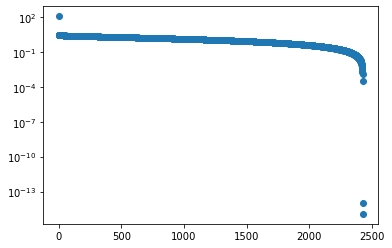

In [165]:
plt.scatter(range(2428),s)
ax = plt.gca()
ax.set_yscale('log')
#the full sigma matrix has one singular value around ~120,
#and the rest of the singular values are less than 4. 

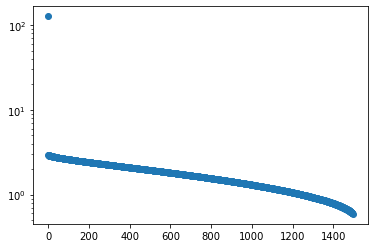

In [168]:
plt.scatter(range(1495),sigprime)
ax = plt.gca()
ax.set_yscale('log')
#the estimated sigma matrix has one singular value around ~120,
#and the rest of the singular values are less than 4. 
#however, there are less singular values for the estimated sigma
#matrix than there are for the full sigma matrix. 

We can define an error with this, and see how the error changes with varying columns of omega

In [178]:
sigerrorlist = []
for i in range(120):
    omega = np.random.rand(2428,i*10 + 5)
    ymat = np.dot(corrmatrix,omega)
    q,r = np.linalg.qr(ymat)
    Bmat = np.dot(q.T,corrmatrix)
    uprime,sigprime,vtprime = np.linalg.svd(Bmat)
    j = len(sigprime)
    sigerrorlist.append(np.linalg.norm(s[:j] - sigprime) / j)
    if i % 10 == 0:
        print(i)

0
10
20
30
40
50
60
70
80
90
100
110


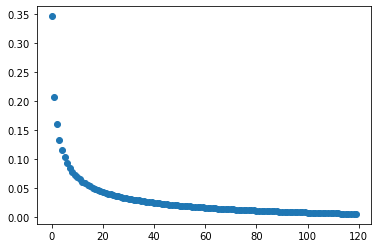

In [180]:
plt.scatter(range(len(sigerrorlist)),sigerrorlist)

Error in the sigma-matrix decreases with increased columns of omega! The end